# CS 156a - Problem Set 4

## Patrone Samuel, 2140749

The following notebook is publicly available at https://github.com/spatrone/CS156A-Caltech.git.

## Problem 1

### Answer: [d] $460,000$

### Derivation:

The VC generalization bound states that, with probability at least $1-\delta$:

$$
E_{out}(g)\le E_{in}(g) + \Omega(N,\mathcal{H},\delta)\,,
$$

where $\Omega(N,\mathcal{H},\delta)$ is the generalization error that can be written as a function of the number of samples $N$, the growth function $m_{\mathcal{H}}(N)$ for the hypothesis set $\mathcal{H}$ and the confidence parameter $\delta$ as the following

$$
\Omega(N,\mathcal{H},\delta)=\sqrt{\frac{1}{8N}\log{\left(\frac{4 m_{\mathcal{H}}(2N)}{\delta}\right)}}\le \sqrt{\frac{1}{8N}\log{\left(\frac{4 (2N)^{d_{VC}}}{\delta}\right)}}\,.
$$

For the growth function $m_{\mathcal{H}}(N)$ we used the polynomial bound 

$$
m_{\mathcal{H}}(N)\le N^{d_{VC}}
$$

where $d_{VC}$ is the VC dimension of the hypothesis set $\mathcal{H}$.

In the following, a simple code to estimate the required number of sample $N$ if we want $\Omega$ to be a specific value `Omega_value` within an error given by `eps`.

In [73]:
import math as m
import numpy as np

def VC_bound(N,d_vc,delta):
    return m.sqrt(8/N*(m.log(4)+d_vc*m.log(2*N) - m.log(delta)))

def find_N(d_vc,delta,Omega_value,eps):
    error=1
    N=1
    while(error>eps):
        error=np.abs((VC_bound(N,d_vc,delta)-Omega_value)/Omega_value)
        if(error>eps): N+=1
    return N  

find_N(10,0.05,0.05,0.00001)

452948

## Problem 2

### Answer: [d] ${\rm Devroye}\; \epsilon \le \sqrt{\frac{1}{2N}\big(4\epsilon(1+\epsilon)+\log{\frac{4 m_{\mathcal{H}}(N^2)}{\delta}}\big)}$

### Code:

In [171]:
import matplotlib.pyplot as plt

def Rademacher(N,d_vc,delta):
    return m.sqrt(2/N*(m.log(2*N)+m.log(2*N)*d_vc))+m.sqrt(2/N*m.log(1/delta))+1/N

def Parrondo_Broek_impl(x,N,d_vc,delta):
    return [m.sqrt(1/N*(2*x[i]+(m.log(6)+d_vc*m.log(2*N)-m.log(delta)))) for i in range(len(x))]

def Devroye_impl(x,N,d_vc,delta):
    return [m.sqrt(1/(2*N)*(4*x[i]*(1+x[i])+(m.log(4)+m.log(N)*2*d_vc-m.log(delta)))) for i in range(len(x))]

def implicit_solve(func,N,d_vc,delta,eps=0.001,xleft=0,xright=1):
    x = np.linspace(xleft, xright, np.int(1/eps)*xright)
    y=func(x,N,d_vc,delta)-x
    root = None  
    for i in range(len(x)-1):
        if y[i]*y[i+1] < 0:
            root = x[i] - (x[i+1] - x[i])/(y[i+1] - y[i])*y[i]
            break 
    if root is None:
        print(f'Error: Could not find any root in the interval[{xleft},{xright}] for {func}')
    else: return root

def print_bounds(N,xleft=0,xright=20):
    print(f'For N={N}\n Original VC Bound={VC_bound(N,d_vc,delta):.3f} \n Rademacher Bound={Rademacher(N,d_vc,delta):.3f} \n Parrondo Broek Bound ={implicit_solve(Parrondo_Broek_impl,N,d_vc,delta,xleft=xleft,xright=xright):.3f} \n Devroye Bound={implicit_solve(Devroye_impl,N,d_vc,delta,xleft=xleft,xright=xright):.3f}')

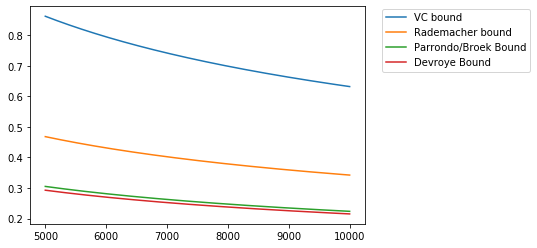

In [173]:
N=np.arange(5000,10001)
d_vc=50
delta=0.05
xleft=0
xright=1

VC_bound_vals=[VC_bound(N[i],d_vc,delta) for i in range(len(N))]
Rademacher_vals=[Rademacher(N[i],d_vc,delta) for i in range(len(N))]
Parrondo_Broek_vals=[implicit_solve(Parrondo_Broek_impl,N[i],d_vc,delta,xleft=xleft,xright=xright) for i in range(len(N))]
Devroye_vals=[implicit_solve(Devroye_impl,N[i],d_vc,delta,xleft=xleft,xright=xright) for i in range(len(N))]

plt.plot(N,VC_bound_vals,label="VC bound")
plt.plot(N,Rademacher_vals,label="Rademacher bound")
plt.plot(N,Parrondo_Broek_vals,label="Parrondo/Broek Bound")
plt.plot(N,Devroye_vals,label="Devroye Bound")
plt.legend(loc=[1.05,0.7])
plt.show()

In [178]:
print_bounds(10000)

For N=10000
 Original VC Bound=0.632 
 Rademacher Bound=0.342 
 Parrondo Broek Bound =0.224 
 Devroye Bound=0.215


## Problem 3

### Answer: [c] ${\rm Parrondo\,and \, Van\, den \,Broek:}\; \epsilon \le \sqrt{\frac{1}{N}\big(2\epsilon+\log{\frac{6 m_{\mathcal{H}}(2N)}{\delta}}\big)}$

### Code:

In [177]:
print_bounds(5)

For N=5
 Original VC Bound=13.828 
 Rademacher Bound=8.148 
 Parrondo Broek Bound =5.101 
 Devroye Bound=5.593


## Problem 4

### Answer: [e] None of the above

### Derivation:

We want to minimize the mean squared error on the two examples given, in formulae:

$$
E_{in}=\frac{1}{N}\sum^N_{i=1}(a x_i-y_i)^2\,.
$$

We can find the $\bar{a}$ that minimizes the error by setting $\frac{d}{da}E_{in}(\bar{a})=0$. For two points, we get:

$$
\bar{a}=\frac{x_1 y_1 + x_2 y_2}{x_1^2 + x_2^2}\,.
$$

Notice that the same result is obtained by applying the Linear Regression Algorithm (which by definition minimizes the mean squared errors). Let $X$ be the matrix of the data points, i.e.

$$
X=
\begin{pmatrix}
x_1\\
x_2
\end{pmatrix}
\,.
$$

The single weight $\bar{a}$ is then found by computing $\bar{a}=X^\dagger y$, where

$$
X^\dagger=(X^T X)^{-1}X^T=
\begin{pmatrix}
\frac{x_1}{x_1^2 + x_2^2}\\
\frac{x_2}{x_1^2 + x_2^2}
\end{pmatrix}
\,
$$

is the pseudo-inverse matrix of $X$.

Finally, we want to find the average hypothesis $\bar{g}(x)$. Given N two-point samples, it can be written as:

$$\bar{g}(x)=\frac{1}{N}\sum_{x\in\chi}h(x)=\frac{\sum^N_{i=0}\bar{a}}{N} x=\bar{a}_{avg}x\,.$$

In [422]:
def a_min(x,y):
    return np.dot(x,y)/np.dot(x,x)

def f(x):
    return np.sin(m.pi*x)

def gen_data(func,N):
    x=np.random.uniform(-1,1,N)
    return x,func(x)

a=[]
Nsamples=10000

for i in range(Nsamples):
    x,y=gen_data(f,2)
    a.append(a_min(x,y))

a_avg=np.mean(a)

print(f'For {Nsamples} samples of two points, a_avg={a_avg:.2f}')   

For 10000 samples of two points, a_avg=1.43


## Problem 5

### Answer: [b] $0.3$ 

### Derivation:

We want to compute the bias for N sample-points:

$$
{\rm bias}=\frac{1}{N}\sum_{x\in\chi}{\rm bias}(x)=\frac{1}{N}\sum^N_{i=1}(\bar{g}(x_i)-f(x_i))^2=\frac{1}{N}\sum^N_{i=1}(\bar{a}_{avg}x_i-f(x_i))^2\,.
$$

In [423]:
bias=0

for i in range(Nsamples):
    x,y=gen_data(f,1)
    bias+=(a_avg*x[0]-y[0])**2

bias=bias/Nsamples

print(f'For {Nsamples} sample-points, bias={bias:.2f}')   

For 10000 sample-points, bias=0.27


## Problem 6

### Answer: [a] $0.2$ 

### Derivation:

We want to compute the variance for N sample-points:

$$
{\rm var}=\frac{1}{N}\sum_{x\in\chi}{\rm var}(x)=\frac{1}{N}\sum^N_{i=1}(h(x)-\bar{g}(x))^2=\frac{1}{N}\sum^N_{i=1}((\bar{a}_i-\bar{a}_{avg})x_i)^2\,.
$$

In [426]:
var=0

for i in range(Nsamples):
    x,y=gen_data(f,1)
    var+=(a[i]*x[0]-a_avg*x[0])**2

var=var/Nsamples

print(f'For {Nsamples} sample-points, bias={var:.2f}')   

For 10000 sample-points, bias=0.24


## Problem 7

### Answer: [b] $h(x)=ax$

### Derivation:

The expected value of out-of-sample error $E_{out}$ in the bias-variance analysis can be written as

$$
E_{out}\sim{\rm bias}+{\rm var}
$$

For the proposed models, taking the other data from the lecture notes, we have:

- [a] $h(x)=b$    has $({\rm bias},{\rm var})=(0.5,0.25)\rightarrow E_{out}\sim 0.75$
- [b] $h(x)=ax$   has $({\rm bias},{\rm var})=(0.3,0.2)\rightarrow E_{out}\sim 0.5$
- [c] $h(x)=ax+b$ has $({\rm bias},{\rm var})=(0.21,1.69)\rightarrow E_{out}\sim 1.9$

where we excluded the quadratic hypothesis since they are too complex for the amount of points provided.

## Problem 8

### Answer: [c] $q$

### Derivation:

When $N<q$, the recursive relation can be solved exactly with initial condition $m_{\mathcal{H}}(1)=2$, giving

$$
m_{\mathcal{H}}(N\le q)=2^N\,.
$$

For $N=q+1$:

$$
m_{\mathcal{H}}(q+1)=2*2^{q}-{q\choose q}=2^{q+1}-1\,.
$$

Hence, $k=q+1$ is a break point for the hypothesis set $\mathcal{H}$. By definition, the VC dimension of the set is then:

$$
d_{VC}=k-1=q\,.
$$


## Problem 9

### Answer: [b] $0\le d_{VC}(\cap_k \mathcal{H}_k)\le {\rm min}\{d_{VC}(\mathcal{H}_k)\}$

### Derivation:

Since the intersection can be the empty set (consider disjoint sets), and by definition the singleton set has VC dimension 0, the lower bound of the intersection has to be 0.

The upper bound should be the minimum VC dimension among all the sets, which we call $d_{min}$. Suppose instead the VC dimension of the intersection set is $d_{min}+1$. This implies that the intersection set hypothesis can shatter $d_{min}+1$ points. Hence, every hypothesis in the intersection should be able to shatter $d_{min}+1$ which contradicts the assumption that $d_{min}$ is the VC dimension of one of the sets.

## Problem 10

### Answer: [e] ${\rm max}\{d_{VC}(\mathcal{H}_k)\}\le d_{VC}(\cup_k \mathcal{H}_k)\le K-1+\sum_k d_{VC}(\mathcal{H}_k)$

### Derivation:

The lower bound of the union set has to be the maximum VC dimension among all the sets $d_{max}$, since we can always shatter $d_{max}$ points with the union set by taking the subset that has $d_{max}$ as its VC dimension.

For the upper bound, we first prove that the union set of two hypothesis sets $\mathcal{H}_1$ and $\mathcal{H}_2$ with VC dimensions $d_1$ and $d_2$ respectively can shatter at most $N-1=d_1+d_2+1$ points. First of all, we observe that the growth function of the union set can be at most the sum of the two growth functions of the two subsets for any $N$. In particular, for $N=d_1+d_2+2$ we find:

$$
m_{\mathcal{H}_1\cup\mathcal{H}_2}(N)\le m_{\mathcal{H}_1}(N)+m_{\mathcal{H}_2}(N) \le \sum_{k=0}^{d_{1}}{N\choose k}+\sum_{k=0}^{d_{2}}{N\choose k}=\sum_{k=0}^{d_{1}}{N\choose k}+\sum_{k=0}^{d_{2}}{N\choose N-k}\\ =\sum_{k=0}^{d_{1}}{N\choose k}+\sum_{k=N-d_2}^{N}{N\choose k}=\sum_{k=0}^{N}{N\choose k}-\sum_{k=d_1+1}^{N-d_2-1}{N\choose k}=2^N-{N\choose d_1+1}<2^N\,.
$$

Therefore, if the first relation is an equality, $N=d_1+d_2+2$ is necessarily a break point for the union set and its VC dimension is $d_{VC}(\mathcal{H}_1\cup \mathcal{H}_2)=d_1+d_2+1$. Therefore, we proved that

$$
d_{VC}(\mathcal{H}_1\cup \mathcal{H}_2)\le d_{VC}(\mathcal{H}_1)+d_{VC}(\mathcal{H}_2)+1\,.
$$

Now, we use induction to prove the upper bound for a generalized union of $K$ hypothesis sets. Let's assume the relation is valid for $K-1$, in formulae:

$$
d_{VC}(\cup_{k=0}^{K-1} \mathcal{H}_k)\le K-2+\sum_{k=0}^{K-1} d_{VC}(\mathcal{H}_k)\,.
$$

For $d_{VC}(\cup_{k=0}^{K} \mathcal{H}_k)$, we can write:

$$
d_{VC}(\cup_{k=0}^{K} \mathcal{H}_k)= d_{VC}(\cup_{k=0}^{K-1} \mathcal{H}_k \cup \mathcal{H}_K)\le d_{VC}(\cup_{k=0}^{K-1} \mathcal{H}_k)+d_{VC}(\mathcal{H}_K)+1\\ \le K-2+\sum_{k=0}^{K-1} d_{VC}(\mathcal{H}_k)+d_{VC}(\mathcal{H}_K)+1=K-1+\sum_{k=0}^{K} d_{VC}(\mathcal{H}_k)\,.
$$